In [1]:
from load_results import load_result_dataset
import pandas as pd
import numpy as np
pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
pn3 = 'none' #'full_fine_tuning_50epochs_budget'

final_data = load_result_dataset(pn1, pn2, pn3)
final_data = [{**d, 'ft_strategy': 'FFT (50 epochs)'} for d in final_data]

../results/none/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/vit_small_patch16_224.augreg_in21k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50

In [5]:
from process_database import process_grouped_df, process_rankings
import statsmodels.api as sm
import statsmodels.formula.api as smf

grouped_df = process_grouped_df(final_data,   )
grouped_df = process_rankings(grouped_df)
analysis = grouped_df[ ('TOTAL', )].reset_index()
process = grouped_df[("TOTAL",)] 
process = process.reset_index()


Percentage of NaN values: 0.00%


In [6]:
# Relevant variable pairs for interaction
interaction_pairs = [ 
                    # "model_size",
                    #   "model_type", 
                    # "loss_function",
                    #  "model_type", 
                    "pre_training_strategy",
                        ]

# Container to store results
results = {}

for var1 in interaction_pairs:
    formula = f"borda ~ C({var1})"
    model = smf.ols(formula, data=process).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Compute group means for plotting
    group_means = process.groupby([var1,])["borda"].mean().reset_index()

    # Store in results dictionary
    key = f"{var1}"
    results[key] = {
        "anova": anova_table,
        "means": group_means,
    }

results


{'pre_training_strategy': {'anova':                                sum_sq    df         F    PR(>F)
  C(pre_training_strategy)   2413609.15   5.0  1.993961  0.089397
  Residual                  17914803.60  74.0       NaN       NaN,
  'means':           pre_training_strategy        borda
  0                        fusion  1241.750000
  1               self-supervised  1006.750000
  2  self-supervised (multimodal)  1566.833333
  3                    supervised  1085.650000
  4        supervised (multistep)  1420.583333
  5           supervised (robust)  1339.500000}}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from statsmodels.stats.multicomp import MultiComparison
import inspect
import matplotlib as mpl

CB_PALETTE = mpl.colormaps['Set2'].colors       # 10 colour-blind-safe hues
sns.set_palette(CB_PALETTE)       # becomes the default for all subsequent plots


# Load the dataset again after reset
# df = pd.read_csv("/mnt/data/fft50_anova.csv")

process= grouped_df[ ('TOTAL', )].reset_index()


# Relevant variable pairs for interaction
interaction_pairs = [
    ("model_size", "model_type"),
    ("loss_function", "model_type"),
    ("loss_function", "model_size"),
    ("pre_training_strategy", "model_type"),
    ("pre_training_strategy", "model_size"),
    ("pre_training_strategy", "loss_function"),
]

# Container to store results
results = {}

for var1, var2 in interaction_pairs:
    print(var1, var2)
    formula = f"borda ~ C({var1}) / C({var2})"
    model = smf.ols(formula, data=process).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Compute group means for plotting
    group_means = process.groupby([var1, var2])["borda"].mean().reset_index()

    # Store in results dictionary
    key = f"{var1}/{var2}"
    results[key] = {
        "anova": anova_table,
        "means": group_means,
    }

results


model_size model_type
loss_function model_type
loss_function model_size
pre_training_strategy model_type
pre_training_strategy model_size
pre_training_strategy loss_function


/Users/maximeheuillet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/Users/maximeheuillet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/Users/maximeheuillet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/maximeheuillet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints

{'model_size/model_type': {'anova':                                    sum_sq    df          F        PR(>F)
  C(model_size)                6.194899e+06   2.0  24.646370  7.433135e-09
  C(model_size):C(model_type)  5.210540e+06   6.0   6.910035  8.287429e-06
  Residual                     8.922974e+06  71.0        NaN           NaN,
  'means':   model_size           model_type        borda
  0      large      fully attention  1210.444444
  1      large  fully convolutional  1797.428571
  2      large               hybrid  1812.750000
  3     medium      fully attention   800.562500
  4     medium  fully convolutional  1268.166667
  5     medium               hybrid  1066.500000
  6      small      fully attention   799.500000
  7      small  fully convolutional   644.833333
  8      small               hybrid  1076.500000},
 'loss_function/model_type': {'anova':                                       sum_sq    df         F    PR(>F)
  C(loss_function)                1.274620e+06   1.0  

In [11]:
import pandas as pd
import scipy.stats as stats

# Define interaction pairs
interaction_pairs = [
    ("model_size", "model_type"),
    ("loss_function", "model_type"),
    ("loss_function", "model_size"),
    ("loss_function", "pre_training_strategy"),
    ("pre_training_strategy", "model_type"),
    ("pre_training_strategy", "model_size"), 
]

# Container for results
results = {}

for var1, var2 in interaction_pairs:
    print(f"{var1} / {var2}")
    df_filtered = process[[var1, var2, 'borda']].dropna().copy()
    df_filtered['interaction'] = df_filtered[var1].astype(str) + ' | ' + df_filtered[var2].astype(str)

    # Compute group means
    group_means = df_filtered.groupby([var1, var2])['borda'].mean().reset_index()

    # Group data by interaction label
    interaction_groups = [group['borda'].values for _, group in df_filtered.groupby('interaction')]

    # Welch-style ANOVA (technically still f_oneway, but applied to heteroscedastic groups)
    try:
        f_stat, p_val = stats.f_oneway(*interaction_groups)
    except Exception:
        f_stat, p_val = float('nan'), float('nan')

    # Mock anova table with similar structure
    anova_table = pd.DataFrame({
        'sum_sq': [None],
        'df': [len(interaction_groups) - 1],
        'F': [f_stat],
        'PR(>F)': [p_val]
    }, index=[f'C({var1}):C({var2})'])

    # Store results
    key = f"{var1}/{var2}"
    results[key] = {
        "anova": anova_table,
        "means": group_means,
    }


model_size / model_type
loss_function / model_type
loss_function / model_size
loss_function / pre_training_strategy
pre_training_strategy / model_type
pre_training_strategy / model_size


model_size model_type
3.34393379387556e-10
2281.0


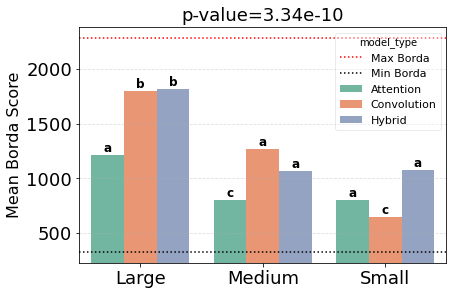

loss_function model_type
0.005198919606017721
2281.0


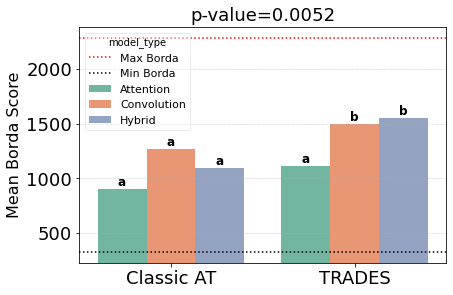

loss_function model_size
9.74921415826036e-07
2281.0


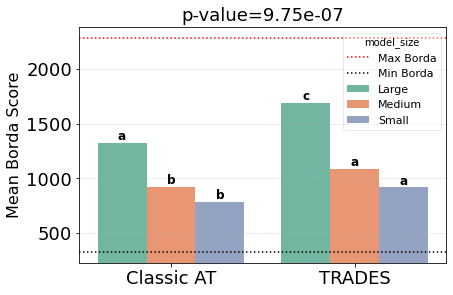

loss_function pre_training_strategy
0.12295316265526897
2281.0


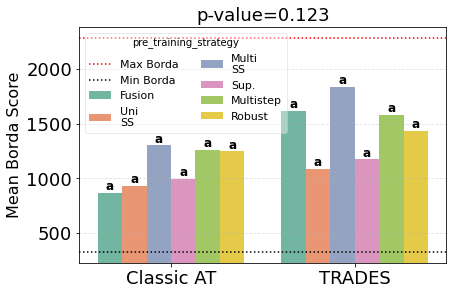

pre_training_strategy model_type
0.04036336819364573
2281.0


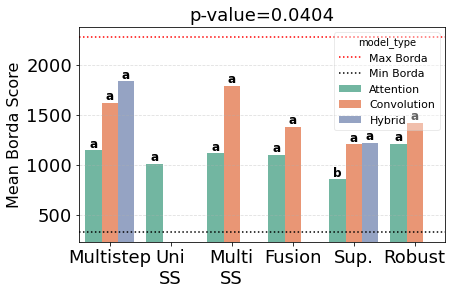

pre_training_strategy model_size
0.00012731104487519258
2281.0


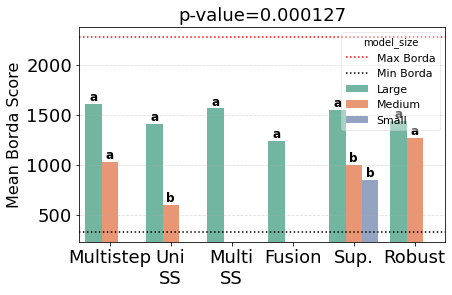

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd
import pandas as pd

CB_PALETTE = mpl.colormaps['Set2'].colors       # 10 colour-blind-safe hues
sns.set_palette(CB_PALETTE)       # becomes the default for all subsequent plots


# Custom label mapping (applies only when var1 is one of these)
xtick_label_map = {
    "large": "Large",
    "medium": "Medium",
    "small": "Small",
    "hybrid": "Hybrid",
    "fusion": "Fusion",
    "self-supervised": "Uni\nSS",
    "self-supervised (multimodal)": "Multi\nSS",
    "supervised": "Sup.",
    "supervised (robust)": "Robust",
    "supervised (multistep)": "Multistep",
    "fully attention": "Attention",
    "fully convolutional": "Convolution",
    "CLASSIC_AT": "Classic AT",
    "TRADES_v2": "TRADES",
}


# ── helpers ──────────────────────────────────────────────────────────────
def anova_stars(p):
    return '***' if p < 1e-3 else '**' if p < 1e-2 else '*' if p < .05 else '†' if p < .1 else ''


def get_tukey_letters(df, group_col, value_col, alpha=0.1):
    """
    Return dict {group_label: letter(s)} using Tukey HSD results.
    Same letter → groups NOT significantly different (α).
    """
    mc      = MultiComparison(df[value_col], df[group_col])
    result  = mc.tukeyhsd(alpha=alpha)

    # Convert summary to DataFrame
    comp = pd.DataFrame(result.summary().data[1:], columns=result.summary().data[0])
    comp['reject'] = comp['reject'].astype(bool)   # ensure Boolean

    groups = list(mc.groupsunique)
    letters = {g: '' for g in groups}
    current_letter = 'a'

    # Greedy algorithm to assign letters
    remaining = set(groups)
    while remaining:
        # Start a new group with the first remaining item
        g0 = sorted(remaining)[0]
        group_set = {g0}

        # Add any non‑significant partners to this letter group
        for g in sorted(remaining):
            # Is there any significant diff between g and something already in group_set?
            sig_any = comp.loc[
                ((comp['group1'] == g) & (comp['group2'].isin(group_set))) |
                ((comp['group2'] == g) & (comp['group1'].isin(group_set))), 'reject'
            ].any()
            if not sig_any:
                group_set.add(g)

        # assign current letter to everyone in this cluster
        for g in group_set:
            letters[g] += current_letter
        remaining -= group_set
        current_letter = chr(ord(current_letter) + 1)

    return letters


def short(lbl: str) -> str:
    return xtick_label_map.get(lbl, lbl)

palette = sns.color_palette(CB_PALETTE, n_colors=10)

for key, res in results.items():
    if 'anova' not in res or 'means' not in res or '/' not in key:
        continue

    var1, var2   = key.split('/')
    df_means     = res['means'].copy()
    df_full      = process.copy()

    print(var1, var2)

    # build orders
    if var1 == "pre_training_strategy":
        x_order = [
            "supervised (multistep)",
            "self-supervised",
            "self-supervised (multimodal)",
            "fusion",
            "supervised",
            "supervised (robust)",
        ]
    else:
        # order = sorted(process[factor].dropna().unique())
        x_order   = sorted(df_means[var1].unique())
    hue_order = sorted(df_means[var2].unique())

    # interaction labels
    df_full['interaction']  = df_full[var1].astype(str) + ' | ' + df_full[var2].astype(str)
    df_means['interaction'] = df_means[var1].astype(str) + ' | ' + df_means[var2].astype(str)

    # Tukey letters
    letters = get_tukey_letters(df_full, 'interaction', 'borda', alpha=0.1)
    df_means['letter'] = df_means['interaction'].map(letters)

    # ANOVA p‑value
    int_label = f'C({var1}):C({var2})'
    anova_p   = res['anova'].loc[int_label if int_label in res['anova'].index
                                 else res['anova'].index[-1], 'PR(>F)']
    
    print(anova_p)

    plt.figure(figsize=(6.4, 4.2))  # clean, LaTeX-optimized

    ax = sns.barplot(data=df_means,
                     x=var1, y='borda', hue=var2,
                     palette=palette,  # <-- integrate color palette here
                     order=x_order, hue_order=hue_order)
    
    # Add horizontal dotted line at max Borda score
    max_borda = max(process.borda)
    print(max_borda)
    ax.axhline(max_borda, color='red', linestyle=':', linewidth=1.5, label="Max Borda")
    min_borda = min(process.borda)
    ax.axhline(min_borda, color='black', linestyle=':', linewidth=1.5, label="Min Borda")
    ax.legend(loc='upper right', frameon=False, fontsize=11)
    ax.set_ylim(min_borda-100, max_borda+100)
    
    handles, labels = ax.get_legend_handles_labels()

    if var2 == "pre_training_strategy":
        ax.legend(
            handles,
            [short(l) for l in labels],
            title=short(var2),
            ncol=2,                   # split into 2 columns
            frameon=True,
            framealpha=0.4,
            fontsize=11
        )
    else:
        ax.legend(
            handles,
            [short(l) for l in labels],
            title=short(var2),
            frameon=True,
            framealpha=0.4,
            fontsize=11
        )

        
    if set(x_order).issubset(xtick_label_map.keys()):
        ax.set_xticklabels([short(l) for l in x_order])

    # annotate letters
    for c_idx, container in enumerate(ax.containers):
        hue_val = hue_order[c_idx]
        for b_idx, bar in enumerate(container):
            x_val  = x_order[b_idx]
            key_lbl = f"{x_val} | {hue_val}"
            letter  = letters.get(key_lbl, '')
            if letter:
                ax.text(bar.get_x() + bar.get_width()/2.,
                        bar.get_height() + 0.01,
                        letter, ha='center', va='bottom',
                        fontsize=12, fontweight='bold')

    plt.title(f"p-value={anova_p:.3g}", fontsize=18) #\n(p={anova_p:.3g}{anova_stars(anova_p)})
    plt.ylabel("Mean Borda Score", fontsize=16)
    plt.xlabel('')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=.4)
    plt.tick_params(axis='both', labelsize=18)

    
    plt.tight_layout()
    # plt.legend(frameon=True, framealpha=0.4)  # lower alpha → more transparency

    plt.savefig(
        f"paper_figures/interaction_{key.replace('/', '_')}.png",  # or .pdf, .svg, etc.
        dpi=300,          # high resolution
        bbox_inches='tight',  # remove extra whitespace
        pad_inches=0.05,       # minimal border around axes
        transparent=False      # or True if you want alpha background
    )

    plt.show()